In [40]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()     #처음 5개 행을 출력

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [41]:
print(pd.unique(fish['Species']))     #주어진 열의 고유한 성분을 추출함

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [43]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()      #데이터 프레임을 넘파이 배열로 변환하여 저장
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [44]:
fish_target = fish['Species'].to_numpy()

In [45]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [46]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)      #표준화 전처리

In [47]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target), kn.score(test_scaled, test_target))

0.8907563025210085 0.85


In [48]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


타킷 데이터에 3개 이상의 클래스가 포함된 문제를 다중 분류(multiclass classification)이라고 부른다.<br/>사이킷런을 통한 다중분류에서는 문자열로 된 타깃값을 그대로 사용할 수 있어 편리하다. 다만 타킷값을 그대로 사이킷런 모델에 전달하면 타킷 클래스들이 자동으로 알파벳 순으로 정렬된다.

In [49]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [50]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])     #predict_proba : 각 클래스별 예측 확률값. 순서는 clsses_와 동일
print(np.round(proba, decimals=4))      #decimals : 표현할 소수점 이하 자리수

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [51]:
distances, indexes = kn.kneighbors(test_scaled[3:4])      #kneighbor()매서드의 입력값은 2차원 배열이여야 하기 때문에 슬라이싱 연산자를 이용한다.
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


최근접 이웃을 통해 확률을 구할 경우, $\frac {N}{최근접이웃 수}$의 형태의 값 밖에 얻을 수 없다. 이런 유형을 문제를 해결할 때 유용한 도구가 로지스틱 회귀(logisstic regression)이라는 분류모델이다.<br/>
로지스틱 회귀 알고리즘은 선형 회귀와 동일하게 선형 방정식을 학습한다. 예를 들면 이번 문제의 경우,
$$z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f$$
라는 식을 학습한다. 이 때 z는 실수 전체를 범위로 가지게 되는데, 우리가 원하는 값은 확률이므로 z를 통해 0에서 1 사이의 값을 얻어야한다.(z가 아주 큰 음수가 되면 0이 되고, 아주 큰 양수가 되면 1이 되면 바람직하다.)<br/>
이 때 유용하게 사용할 수 있는 함수가 시그모이드 함수(sigmoid function)이다.
$$\phi = \frac{1}{1+e^{-z}}$$
이 함수를 이용하면 z를 통해 아래와 같은 그래프를 얻을 수 있다.

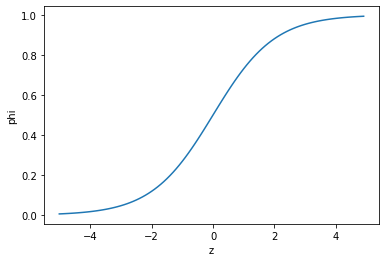

In [52]:
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)     #그래프를 그리기 위해 -5부터 5까지 0.1간격으로 배열 z를 생성함.
phi = 1 / (1 + np.exp(-z))      #시그모이드 함수
plt.plot(z, phi)      #각 z값에 대응하는 시그모이드 함수 값을 표시
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

시그모이드 함수에 대해 알아보았으니, 로지스틱 회귀 실습을 해보자.<br/>사이킷런에는 로지스틱 회귀 모델인 LogisticRegression 클래스가 준비되어 있으니 이를 이용하면 된다.<br/>
로지스틱 회귀의 이해를 위해 다중 분류를 수행하기에 앞서 도미(bream)와 빙어(Smelt)를 사용해 간단한 이진 분류를 수행해보자.<br/> 이진 분류의 경우 출력값(phi)이 0.5이상이면 양성 클래스, 0.5미만이면 음성 클래스로 판단한다.<br/>
여담으로 0.5에 대한 클래스 판단은 라이브러리마다 다를 수 있다.

In [53]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])      #넘파이 배열은 True, False값을 전달하여 행을 선택할 수 있다. 이를 불리언 인덱싱(boolean indexing)이라고 한다.

['A' 'C']


In [55]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')     #도미나 빙어일 경우 True, 그 외는 False가 입력된 배열 생성
train_bream_smelt = train_scaled[bream_smelt_indexes]     #불리언 인덱싱
target_bream_smelt = train_target[bream_smelt_indexes]      #불리언 인덱싱

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)     #로지스틱 회귀를 이용한 훈련

print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [56]:
print(lr.predict_proba(train_bream_smelt[:5]))      #KNeighborsClassifier과 같이 predict_proba()메서드를 통해 예측 확률을 출력

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [57]:
print(lr.classes_)      #사이킷런은 타깃값을 알파벳순으로 정렬하기 때문에 확률의 첫 번째 열이 음성인 도미, 두 번째 열이 양성인 빙어이다.

['Bream' 'Smelt']


In [58]:
print(lr.coef_, lr.intercept_)      #로지스틱 회귀가 학습한 계수를 확인

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


즉 이 모델은
$$z = -0.404 * (Weight) -0.576  * (Length) -0.663 * (Diagonal) -1.013 * (Height) -0.732 * (Width) *2.162$$
의 방정식을 학습했다.<br/>
또한 처음 다섯개의 샘플에 대한 z값은 다음과 같다.

In [59]:
decisions = lr.decision_function(train_bream_smelt[:5])     #decision_function() 메서드는 z값을 출력.
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [60]:
from scipy.special import expit     #파이썬의 scipy라이브러리에서 expit를 통해 시그모이드 함수를 지원한다.

print(expit(decisions))     #5개 샘플에 대한 양성일 확률

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


LogisticRegression 클래스는 반복적인 알고리즘을 사용하는데 max_iter 매개변수를 통해 그 값을 지정해 줄 수 있다. 기본값은 100이다.<br/>
또한 계수의 제곱을 통해 규제하는데(L2규제), alpha 매개변수를 이용하는 릿지회귀와는 달리 로지스틱 회귀는 C 매개변수를 이용한다.<br/>
값이 커질수록 규제가 강해지는 alpha와는 달리 C는 값이 작을수록 규제가 강해진다. C의 기본값은 1이다. 

In [62]:
lr = LogisticRegression(max_iter=1000, C=20)      #반복을 1000으로 늘리고, 규제를 20으로 완화
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [63]:
print(lr.predict(test_scaled[:5]))      #테스트 샘플의 첫 5개 샘플에 대한 예측

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [65]:
proba = lr.predict_proba(test_scaled[:5])
print(lr.classes_)
print(np.round(proba, decimals=3))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


앞서 이진 분류에서 시그모이드 함수를 사용해 z를 0에서 1 사이의 값으로 변환하였다.<br/>
다만 다중 분류의 경우 이 z값이 목표 클래스의 종류만큼 생성되므로(즉 $z1$부터 $z_7$까지 7개의 z값을 가진다) 시그모이드 함수를 이용할 수 없다.<br/>
그 대신 사용하는 것이 소프트맥스(softmax)함수이다.<br/>
소프트맥스 함수는 여러 개의 선형 방정식의 출력값(z)를 0~1사이로 압축하고 이들 전체 합을 1이 되도록 만든다. 이 때 지수함수를 이용하기 때문에 정규화된 지수 함수라고도 부른다.<br/>
예를 들어 위 실습의 경우, 다음과 같은 $s_1$ ~ $s_7$값을 계산한다.
$$s_n = \frac{e_n}{\sum_1^7{e_m}} \ \ \ (단, n<8인 자연수)$$
앞의 이진분류에서와 같이 decision_function() 메서드로 $z_1$ 부터 $z_7$값을 구한 다음 소프트맥스 함수를 사용해 확률로 바꾸어 보자.

In [66]:
decisions = lr.decision_function(test_scaled[:5])     #첫 5개 테스트 샘플에 대한 z값
print(np.round(decisions, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [68]:
from scipy.special import softmax     #역시 파이썬의 scipy 라이브러리에서 softmax함수를 지원한다.

proba = softmax(decisions, axis=1)     #decisions배열을 각 샘플(행, axis=1)에 대해 소프트맥스를 계산. axis를 지정하지 않을 시 배열 전체에 대해 계산
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
